In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/finalfreqfeature/finaladditionalfeaturefreq_2022_12_31_07_09_1672513798
/kaggle/input/model-trainingdata/df_final-2023_01_01_10_42_1672569751


In [2]:
#cp /kaggle/input/model-trainingdata/df_final-2023_01_01_10_42_1672569751 .

In [3]:
#ls -l

In [4]:

#dbfile = open('df_final-2023_01_01_10_42_1672569751', 'rb') 
#dataset = pickle.load(dbfile)

In [5]:
#dbfile.close()

In [6]:
#from sklearn.linear_model import Perceptron

In [7]:
# extracting signal/noise label feature
#y=dataset['y']

In [8]:
#temp_dataset=dataset[:]

In [9]:
# removing y from dataset
#x=temp_dataset.drop(['y'], axis=1)

In [10]:
# perceptron model
#ppn = Perceptron(eta0=0.1, random_state=1)

In [11]:
# x = temp dataset 
# y = label 
#ppn.fit(x,y)

In [12]:
#!touch perceptron_ppn-`date +"%Y_%m_%d_%I_%M_%s"`

In [13]:
# code for saving the perceptron model ppn
#model_file = open('perceptron_ppn-2023_01_01_12_30_1672576249','ab')
#pickle.dump(ppn,model_file)     

In [14]:
#model_file.close()

In [15]:
#ls -l

# Test Data Generation

In [16]:
!pip install git+https://github.com/PyFstat/PyFstat@python37

  Cloning https://github.com/PyFstat/PyFstat (to revision python37) to /tmp/pip-req-build-8p97wa0v
  Running command git clone --filter=blob:none --quiet https://github.com/PyFstat/PyFstat /tmp/pip-req-build-8p97wa0v
  Running command git checkout -b python37 --track origin/python37
  Switched to a new branch 'python37'
  Branch 'python37' set up to track remote branch 'python37' from 'origin'.
  Resolved https://github.com/PyFstat/PyFstat to commit 73ad1acdc9385a234727abf3eb9f93c9298fc5e5
  Preparing metadata (setup.py) ... done


In [17]:
import numpy as np

import pyfstat
from pyfstat.utils import get_sft_as_arrays

# Local module to simplify plotting
#import tutorial_utils

logger = pyfstat.set_up_logger(label="0_generating_noise", log_level="INFO")
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# NOISE

# Setup Writer
writer_kwargs = {
    "label": "single_detector_gaussian_noise",
    "outdir": "PyFstat_example_data",
    "tstart": 1238166018,  # Starting time of the observation [GPS time]
    "duration": 365 * 86400,  # Duration [seconds]
    "detectors": "H1",  # Detector to simulate, in this case LIGO Hanford
    "F0": 100.0,  # Central frequency of the band to be generated [Hz]
    "Band": 1.0,  # Frequency band-width around F0 [Hz]
    "sqrtSX": 1e-23,  # Single-sided Amplitude Spectral Density of the noise
    "Tsft": 1800,  # Fourier transform time duration
    "SFTWindowType": "tukey",  # Window function to compute short Fourier transforms
    "SFTWindowBeta": 0.01,  # Parameter associated to the window function
}
writer = pyfstat.Writer(**writer_kwargs)

# Create SFTs
writer.make_data()

23-01-01 13:56:41.586 pyfstat.core INFO    : Creating Writer object...
23-01-01 13:56:41.588 pyfstat.utils.ephemeris INFO    : No /root/.pyfstat.conf file found. Will fall back to lal's automatic path resolution for files [earth00-40-DE405.dat.gz,sun00-40-DE405.dat.gz]. Alternatively, set 'earth_ephem' and 'sun_ephem' class options.
23-01-01 13:56:41.590 pyfstat.make_sfts INFO    : Generating SFTs with fmin=99.5, Band=1.0
23-01-01 13:56:41.592 pyfstat.make_sfts INFO    : Got h0=0, not writing an injection .cff file.
23-01-01 13:56:41.593 pyfstat.make_sfts INFO    : Checking if we can re-use existing SFT data file(s)...
23-01-01 13:56:41.595 pyfstat.make_sfts INFO    : ...OK: file(s) found matching 'PyFstat_example_data/H-17520_H1_1800SFT_single_detector_gaussian_noise-1238166018-31536000.sft'.
23-01-01 13:56:41.597 pyfstat.make_sfts INFO    : ...OK: The config file 'PyFstat_example_data/single_detector_gaussian_noise.cff' is older than the SFT file(s) 'PyFstat_example_data/H-17520_H1_1

In [19]:
# noise fourier data creation

frequency_noise, timestamps_noise, fourier_data_noise = get_sft_as_arrays(writer.sftfilepath)

23-01-01 13:56:49.045 pyfstat.utils.sft INFO    : Loading 17520 SFTs from H1...


In [20]:
# SIGNAL + NOISE

writer_kwargs = {
    "label": "single_detector_gaussian_noise",
    "outdir": "PyFstat_example_data",
    "tstart": 1238166018,
    "duration": 365 * 86400,
    "detectors": "H1",
    "Band": 1.0,  # Frequency band-width around F0 [Hz]
    "sqrtSX": 1e-23,
    "Tsft": 1800,
    "SFTWindowType": "tukey",
    "SFTWindowBeta": 0.01,
}

signal_parameters = {
    "F0": 100.0,
    "F1": -1e-9,
    "Alpha": 0.0,
    "Delta": 0.0,
    "h0": 1e-22,
    "cosi": 1,
    "psi": 0.0,
    "phi": 0.0,
    "tref": writer_kwargs["tstart"],
}

writer = pyfstat.Writer(**writer_kwargs, **signal_parameters)
writer.make_data()

23-01-01 13:56:49.477 pyfstat.core INFO    : Creating Writer object...
23-01-01 13:56:49.480 pyfstat.utils.ephemeris INFO    : No /root/.pyfstat.conf file found. Will fall back to lal's automatic path resolution for files [earth00-40-DE405.dat.gz,sun00-40-DE405.dat.gz]. Alternatively, set 'earth_ephem' and 'sun_ephem' class options.
23-01-01 13:56:49.482 pyfstat.make_sfts INFO    : Generating SFTs with fmin=99.5, Band=1.0
23-01-01 13:56:49.484 pyfstat.make_sfts INFO    : Checking if we can re-use injection config file...
23-01-01 13:56:49.485 pyfstat.make_sfts INFO    : ...OK: config file PyFstat_example_data/single_detector_gaussian_noise.cff already exists.
23-01-01 13:56:49.486 pyfstat.make_sfts INFO    : ...OK: file contents match, no update of PyFstat_example_data/single_detector_gaussian_noise.cff required.
23-01-01 13:56:49.487 pyfstat.make_sfts INFO    : Checking if we can re-use existing SFT data file(s)...
23-01-01 13:56:49.488 pyfstat.make_sfts INFO    : ...OK: file(s) found

In [21]:
# Signal + noise fourier data creation

frequency_signal, timestamps_signal, fourier_data_signal = get_sft_as_arrays(writer.sftfilepath)

23-01-01 13:56:58.846 pyfstat.utils.sft INFO    : Loading 17520 SFTs from H1...


In [22]:
# complex SFFT to real data  $ flattening of array

      # signal - 
signal_flatten=np.absolute(fourier_data_signal['H1']).flatten()
signal_matrix=np.absolute(fourier_data_signal['H1'])

     # noise - 
noise_flatten=np.absolute(fourier_data_noise['H1']).flatten()
noise_matrix=np.absolute(fourier_data_noise['H1'])

In [23]:
# fourier real matrix conversion to power in db

    # signal - 
    
signal_power = 10 * np.log10(signal_matrix)

    
    # noise -
    
noise_power = 10 * np.log10(noise_matrix)

#signal_power,noise_power

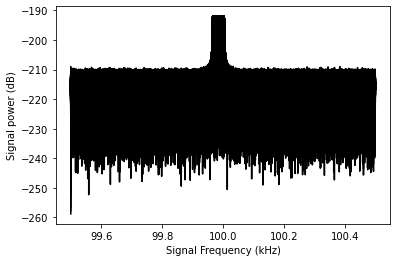

In [24]:
# Plotting frequency scale with power of signal + noise data

plt.figure()
plt.plot(frequency_signal, signal_power, color='black')
plt.xlabel('Signal Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()


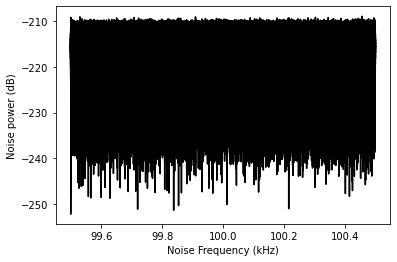

In [25]:
## Plotting frequency scale with power of noise data

plt.figure()
plt.plot(frequency_noise, noise_power, color='black')
plt.xlabel('Noise Frequency (kHz)')
plt.ylabel('Noise power (dB)')
plt.show()

In [26]:
#  creating the dict/map corresponding to frequency with max of noise powerarray matrix with (len = 17520) 

noisemax={}
noisemaxfreq={}
for x in range(0,len(frequency_noise)):
    noisemax[frequency_noise[x]]=noise_power[x].max()
for a in noisemax:
    if noisemax[a]>-210:
        noisemaxfreq[a]=noisemax[a]
noisemaxfreqKeys=noisemaxfreq.keys()   
noisemaxfreqKeyslist=list(noisemaxfreqKeys)
len(noisemaxfreqKeyslist)

426

In [27]:
#  creating the dict/map corresponding to frequency with max of signal powerarray matrix with (len = 17520) 

signalmax={}
signalmaxfreq={}
for x in range(0,len(frequency_signal)):
    signalmax[frequency_signal[x]]=signal_power[x].max()
for a in signalmax:
    if signalmax[a]>-210:
        signalmaxfreq[a]=signalmax[a]
signalmaxfreqKeys=signalmaxfreq.keys()
signalmaxfreqKeyslist=list(signalmaxfreqKeys)
len(signalmaxfreqKeyslist)

590

# Creating 17000+ features and Loading Extracted features from external file  additional_noise+additional_signal

In [28]:
df1 = pd.DataFrame(fourier_data_noise['H1'].imag)
dfx1=df1.applymap(np.absolute)

In [29]:
df2 = pd.DataFrame(fourier_data_signal['H1'].imag)
dfx2=df2.applymap(np.absolute)

In [30]:
cp /kaggle/input/finalfreqfeature/finaladditionalfeaturefreq_2022_12_31_07_09_1672513798 .

In [ ]:
pwd

In [31]:
ls -l

total 1485580
drwxr-xr-x 2 root root       4096 Jan  1 11:50 PyFstat_example_data/
---------- 1 root root        263 Jan  1 11:28 __notebook_source__.ipynb
-rw-r--r-- 1 root root 1523187042 Jan  1 11:29 df_final-2023_01_01_10_42_1672569751
-rw-r--r-- 1 root root       2654 Jan  1 14:00 finaladditionalfeaturefreq_2022_12_31_07_09_1672513798
-rw-r--r-- 1 root root     142112 Jan  1 12:34 perceptron_ppn-2023_01_01_12_30_1672576249
-rw-r--r-- 1 root root     283460 Jan  1 13:05 svm_model-2023_01_01_01_03_1672578238


In [32]:
# getting additional feature extracted from finaladditionalfeaturefreq_2022_12_31_07_09_1672513798

dbfile = open('finaladditionalfeaturefreq_2022_12_31_07_09_1672513798', 'rb') 
finalfeature= pickle.load(dbfile)

In [33]:
dbfile.close()

In [34]:
additional_noise,additional_signal=finalfeature

In [35]:
# working on signal data frame d2
    
    # adding and filling additional feature """ signal""" column in signal dataframe
for i in additional_signal:
    if i in set(signalmaxfreq.keys()) and i not in set(noisemaxfreq.keys()):
        dfx2[i]=1
    elif i not in set(signalmaxfreq.keys()) and i in set(noisemaxfreq.keys()):
        dfx2[i]=0
    else:
        dfx2[i]=-1

In [36]:
# working on signal data frame d2
        
    # adding and filling additional feature """noise""" column in signal dataframe d2
for i in additional_noise:
    if i in set(noisemaxfreq.keys()) and i not in set(signalmaxfreq.keys()):
        dfx2[i]=0
    elif i not in set(noisemaxfreq.keys()) and i in set(signalmaxfreq.keys()):
        dfx2[i]=1
    else:
        dfx2[i]=-1    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

In [37]:
# Working on noise data frame d1

    #  adding and filling additional feature """signal""" column in noise dataframe d1
for i in additional_signal:
    if i in set(signalmaxfreq.keys()) and i not in set(noisemaxfreq.keys()):
        dfx1[i]=0
    elif i not in set(signalmaxfreq.keys()) and i in set(noisemaxfreq.keys()):
        dfx1[i]=1
    else:
        dfx1[i]=-1

In [38]:
# Working on noise data frame d1
    
    #  adding and filling additional feature """noise""" column in noise dataframe d1
for i in additional_noise:
    if i in set(noisemaxfreq.keys()) and i not in set(signalmaxfreq.keys()):
        dfx1[i]=1
    elif i not in set(noisemaxfreq.keys()) and i in set(signalmaxfreq.keys()):
        dfx1[i]=0
    else:
        dfx1[i]=-1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

In [39]:
dfx2['y']=1
dfx1['y']=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [40]:
dfx3=dfx1.append(dfx2, ignore_index=True)

In [41]:
y_test=dfx3['y']
x_test=dfx3.drop(['y'], axis=1)

# Prediction using PERCEPTRON

In [42]:
#y_test_pred = ppn.predict(x_test)

In [43]:
#print('Misclassified examples: %d' % (y_test != y_test_pred).sum())

In [ ]:
pwd

In [44]:
# checking loading of perceptron saved model
load_ppn = open('/kaggle/working/perceptron_ppn-2023_01_01_12_30_1672576249', 'rb') 
load_model_ppn = pickle.load(load_ppn)

In [45]:
load_ppn.close()

In [46]:
y_test_pred2 = load_model_ppn.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,


In [47]:
print('Misclassified count: %d' % (y_test != y_test_pred2).sum())

Misclassified count: 0
